In [5]:
#Import required librairies
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# This function is defined only for the case where we are evaluating the solution to the grobner basis for the sudoku. As the polynomials are all linear, in terms of w and equall to 0, the function takes these polynomials as an input and will put every term except for the vertice term to the right. Essentially it solves these determined polynomials.
def extractSolutions(polynomials):
    solutions = {}
    for p in polynomials:
        variable = list(p.variables())[0] #Extracts the variable
        value = -p.constant_coefficient() #Solves the root
        solutions[variable] = value 
    return solutions

In [7]:
def main():
    k = 3 # number of available colors
    n = 36# number of vertices
    R.<w> = PolynomialRing(QQ)
    F.<w> = NumberField(w^(2) + w + 1) # add the kth cyclotomic polynomial
    R = PolynomialRing(F, n, names=['x{}'.format(i) for i in range(1,n+1)], order='degrevlex')
    x = R.gens()  # x is a tuple containing the variables
    
    #Declares the edges
    edges = [(1,2),(1,4),(1,6),(2,3),(2,5),(2,7),(2,17),(2,18),(3,8),(3,10),(3,19),(4,9),(4,11),(5,6),(5,9),(5,12),(5,18),(6,7),(6,10),(7,8),(7,11),(8,9),(8,12),(9,20),(10,11),(10,21),(10,19),(10,20),(11,12),(11,21),(1,13),(4,13),(12,13),(2,15),(3,15), (1, 14), (2,14), (7,15),(7,17),(4,15),(14,15),(1,16),(12,16),(20,8),(20,11), (9,10), (8,22),(9,22),(19,22),(11,23),(12,23),(16,23),(4,23), (7,24),(8,24),(3,24),(15,24), (5,25),(12,25),(6,26),(7,26),(25,26), (4,27),(13,27),(1,28),(13,28), (1,29),(14,29), (2,30),(15,30), (3,31),(15,31),(31,32),(3,32),(4,32),(28,33),(29,33),(10,34),(19,34), (14,35),(2,35),(30,35), (27,36),(4,36),(34,36),(3,36)]
    
    index = list(range(0,n)) #Declares a list containing the vertice indices
    
    functions = [] #Initializes a list for the required polynomial system
    
    for i in index:
        functions.append(x[i]^k - 1) #Adds the constraints for the collours
    for edge in edges:
        functions.append(sum([x[edge[0]-1]^(k-1-m) * x[edge[1]-1]^m for m in range(0,k)])) #Adds the constraints for the edges

    substitutionDictionairy = {x[0]: 1,  x[1]: w} #Assigns a collour for the first two vertices
    functions = [f.subs(substitutionDictionairy) for f in functions] #Substitutes the values of the first two vertices.

    functions.append(x[0]-1) #Adds the constraints for the first two vertices collours
    functions.append(x[1]-w)


    I = Ideal(functions)  #Let sage compute the ideal defined by the constraints
    G = I.groebner_basis() #Let sage compute the Gröbner basis defined by the ideal
    print(list(G))
    number_of_colorings = I.radical().vector_space_dimension() #Determines the number of colorings
    print('Number of colorings using at most', k, 'colors: ', number_of_colorings)
    solutions = extractSolutions(list(G)) #Extracts the solutions
    return (solutions, edges)



In [14]:
def plotGraph(firstSolution, edges):
    collours = {
        '1': "red",
        'w': "blue",
        '-w - 1': "yellow",
    }
    G = nx.Graph() #Initiate a graph
    for i in range(1,len(firstSolution)+1): #Set nodes
        G.add_node(i)

    for edge in edges: #Set edges
        G.add_edge(edge[0], edge[1])
    positions = {} #Give coordinates in the graph to corresponding vertices
    
    forbiddenCoordinates = [] #Set a list that will be filled with coordinates that shall not be used

    for i in range(1,len(firstSolution)+1):
        potCoordinate = (np.random.randint(-Integer(1000), Integer(1001)),np.random.randint(-Integer(1000), Integer(1001)))
        while potCoordinate in forbiddenCoordinates:
            potCoordinate = (np.random.randint(-Integer(1000), Integer(1001)),np.random.randint(-Integer(1000), Integer(1001)))
            #Generate coordinate for a vertex
        positions[i] = potCoordinate
        #Extennd list of forbidden coordinates st no coordinates shall be placed near each other
        for k in range(50):
            for j in range(50):
                forbiddenCoordinate1 = (potCoordinate[0] + k,potCoordinate[1]+j)
                forbiddenCoordinate2 = (potCoordinate[0] - k,potCoordinate[1]-j)
                forbiddenCoordinate3 = (potCoordinate[0] + k,potCoordinate[1]-j)
                forbiddenCoordinate4 = (potCoordinate[0] - k,potCoordinate[1]+j)
                forbiddenCoordinates.extend([potCoordinate, forbiddenCoordinate1, forbiddenCoordinate2, forbiddenCoordinate3,  forbiddenCoordinate4])
    

    nodeCollours = [collours[str(val)] for val in firstSolution]
    options = {
        "font_size": 5,
        "node_size": 200,
        "node_color": nodeCollours,
        "edgecolors": "black",
        "linewidths": 1,
        "width": 1,
    }
    nx.draw_networkx(G, positions, **options)
    

# Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()

In [15]:
(solutions, edges) = main()

[x1 - 1, x2 + (-w), x3 + (w + 1), x4 + (w + 1), x5 - 1, x6 + (-w), x7 + (w + 1), x8 - 1, x9 + (-w), x10 - 1, x11 + (-w), x12 + (w + 1), x13 + (-w), x14 + (w + 1), x15 - 1, x16 + (-w), x17 - 1, x18 + (w + 1), x19 + (-w), x20 + (w + 1), x21 + (w + 1), x22 + (w + 1), x23 - 1, x24 + (-w), x25 + (-w), x26 - 1, x27 - 1, x28 + (w + 1), x29 + (-w), x30 + (w + 1), x31 + (-w), x32 - 1, x33 - 1, x34 + (w + 1), x35 - 1, x36 + (-w)]


Number of colorings using at most 3 colors:  1


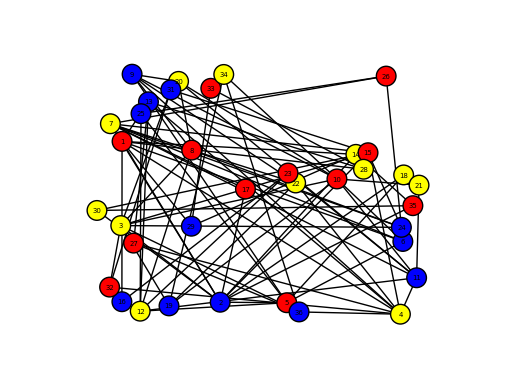

In [16]:
plotGraph(list(solutions.values()), edges)